In [ ]:
# ! pip install torchvision

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader #데이터를 특정 길이로 읽어오기
import torch.nn as nn 
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [3]:
USE_CUDA=torch.cuda.is_available()
print(USE_CUDA)
device=torch.device('cuda' if USE_CUDA else 'cpu')
print("다음기기 사용:", device)

False
다음기기 사용: cpu


In [4]:
random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
epochs=30
batch_size=100

In [6]:
mnist_train=dsets.MNIST(root='MNIST_data/', 
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)
mnist_test=dsets.MNIST(root='MNIST_data/', 
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [7]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [8]:
data_loader=DataLoader(dataset=mnist_train, 
                       batch_size=batch_size,
                       shuffle=True,
                       drop_last=True)

In [9]:
for X, Y in data_loader:
    print(X.size(), Y.size())

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

In [10]:
print(len(data_loader))

600


In [11]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

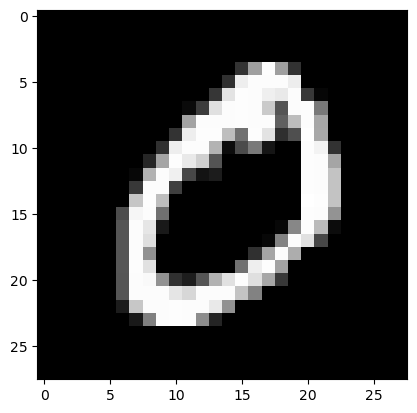

In [14]:
import matplotlib.pyplot as plt
plt.imshow(mnist_train.data[1].view(28,28), cmap='grey')
plt.show()

In [15]:
print(mnist_train.targets[1])

tensor(0)


In [19]:
model=nn.Linear(784,10, bias=True).to(device)
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(model.parameters(), lr=0.1)

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[ 2.7237e-02,  2.7221e-02,  1.6018e-02,  ...,  2.0005e-02,
          -2.4505e-02,  1.1644e-02],
         [-3.8575e-03,  2.9399e-02,  7.4099e-03,  ..., -2.9822e-02,
           7.4010e-05,  2.6787e-02],
         [ 3.0080e-02, -2.1328e-02,  6.5948e-03,  ..., -1.5580e-02,
           3.3823e-02,  1.7100e-02],
         ...,
         [ 2.2515e-03,  1.1732e-02,  2.0664e-02,  ..., -1.2429e-02,
          -1.0554e-02, -8.9825e-03],
         [-1.2693e-02, -8.0397e-03,  2.9975e-02,  ...,  7.1139e-03,
           2.5636e-02,  3.3242e-02],
         [-2.7865e-02,  5.3291e-03,  1.4840e-03,  ..., -2.2437e-02,
           1.7010e-02, -2.8653e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0111,  0.0345,  0.0230,  0.0343,  0.0262, -0.0135,  0.0185,  0.0145,
          0.0128, -0.0055], requires_grad=True)]

In [20]:
for epoch in range(epochs):
    avg_cost=0
    total_batch=len(data_loader)

    for X,Y in data_loader:
        X=X.view(-1,28*28).to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        y_hat=model(X)
        cost=criterion(y_hat, Y)

        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
    
    print('epoch', epoch, 'cost:', avg_cost.item())
print("Learning finished")

epoch 0 cost: 0.5349040627479553
epoch 1 cost: 0.3593370020389557
epoch 2 cost: 0.33133843541145325
epoch 3 cost: 0.3163362443447113
epoch 4 cost: 0.3070734143257141
epoch 5 cost: 0.3003302812576294
epoch 6 cost: 0.29488322138786316
epoch 7 cost: 0.29077622294425964
epoch 8 cost: 0.2871943414211273
epoch 9 cost: 0.2844286561012268
epoch 10 cost: 0.2818949222564697
epoch 11 cost: 0.27971675992012024
epoch 12 cost: 0.27768006920814514
epoch 13 cost: 0.27599242329597473
epoch 14 cost: 0.27434903383255005
epoch 15 cost: 0.27298274636268616
epoch 16 cost: 0.27164196968078613
epoch 17 cost: 0.270510196685791
epoch 18 cost: 0.2692672312259674
epoch 19 cost: 0.2682587206363678
epoch 20 cost: 0.2673230767250061
epoch 21 cost: 0.266480952501297
epoch 22 cost: 0.2653772532939911
epoch 23 cost: 0.2648010551929474
epoch 24 cost: 0.2640140950679779
epoch 25 cost: 0.26316383481025696
epoch 26 cost: 0.26239773631095886
epoch 27 cost: 0.26198169589042664
epoch 28 cost: 0.2613043785095215
epoch 29 cost: